In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.optimizers import gradient_descent_v2
from plot import *
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.preprocessing import image
from keras.models import load_model
from load_image import *
from base_model import *
import os
import time
# from beepy import beep

model = model_VGG16()
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=1e-4),
              metrics=["accuracy"])
model_summary = model.summary()

Found 714 images belonging to 7 classes.
Found 112 images belonging to 7 classes.
Found 714 images belonging to 7 classes.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
    

In [2]:
from keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor='val_loss', patience=3)
start_history = time.perf_counter()

# model = load_model(filepath='./model')
# steps_per_epoch = round(714 / batch_size_train)
steps_per_epoch = 16
validation_steps = round(112 / batch_size_val)

history = model.fit(train_data_augmented,
                    epochs=60,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validation_data,
                    validation_steps=validation_steps,
                    callbacks=[earlystopping])

elapsed_history = time.perf_counter() - start_history

Epoch 1/60
16/16 [==============================] - 86s 5s/step - loss: 1.1805 - accuracy: 0.5625 - val_loss: 1.7100 - val_accuracy: 0.5179
Epoch 2/60
16/16 [==============================] - 85s 5s/step - loss: 0.2568 - accuracy: 0.9262 - val_loss: 0.4983 - val_accuracy: 0.8661
Epoch 3/60
16/16 [==============================] - 87s 6s/step - loss: 0.2014 - accuracy: 0.9453 - val_loss: 0.3507 - val_accuracy: 0.8929
Epoch 4/60
16/16 [==============================] - 87s 6s/step - loss: 0.0383 - accuracy: 0.9922 - val_loss: 0.5462 - val_accuracy: 0.8304
Epoch 5/60
16/16 [==============================] - 91s 6s/step - loss: 0.0799 - accuracy: 0.9688 - val_loss: 0.4019 - val_accuracy: 0.8571
Epoch 6/60
16/16 [==============================] - 86s 6s/step - loss: 0.0827 - accuracy: 0.9688 - val_loss: 0.4377 - val_accuracy: 0.8661


In [3]:
# beep(sound='success')

train_accuracy = model.evaluate(train_data_augmented)
print(f'Training Loss : {train_accuracy[0]}')
print(f'Training Accuracy : {round(train_accuracy[1] * 100, 2)}%\n')

val_accuracy = model.evaluate(validation_data)
print(f'Validation Loss : {val_accuracy[0]}')
print(f'Validation Accuracy : {round(val_accuracy[1] * 100, 2)}%')

90/90 [==============================] - 215s 2s/step - loss: 0.0510 - accuracy: 0.9804
Training Loss : 0.05097118392586708
Training Accuracy : 98.04%

14/14 [==============================] - 34s 2s/step - loss: 0.4377 - accuracy: 0.8661
Validation Loss : 0.43770280480384827
Validation Accuracy : 86.61%


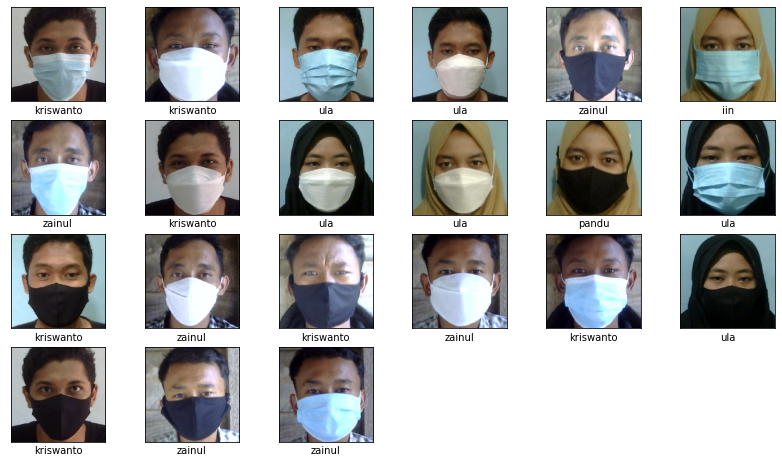

In [9]:
from keras.preprocessing import image as krimg
import matplotlib.image as mpimpg
import glob

faceimagedir = '/home/dev/Developer/Tensorflow/FaceRecognition_App/masked-face-test-v2'

images = []
images_paths = []
for img_path in glob.glob(faceimagedir + '/*.jpg'):
    images.append(mpimpg.imread(img_path))
    images_paths.append(img_path)
    
plt.figure(figsize=(14, 8))
columns = 6

for i, image in enumerate(images):
    img = krimg.load_img(images_paths[i], target_size=(img_width, img_height))

    image_to_predict = np.expand_dims(img, axis=0)
    predictions = model.predict(image_to_predict)
    classes = np.argmax(predictions, axis = 1)
    
    rows = int(len(images) / columns + 1)
    plt.subplot(rows, columns, i + 1)
    # plt.text(4, 58, class_names[classes][0], bbox={'facecolor': 'white', 'pad': 3})
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[classes][0])
    # plt.title(f'{class_names[classes][0]}')
    plt.imshow(img)

In [5]:
## Create directory to save the result
test_time = time.strftime('%Y%m%d_%H%M')
result_dir = f'results/{test_case}/{test_time}'
if (os.path.exists(result_dir) == False):
        os.makedirs(result_dir)
        
## Write History Time and Evaluate into a txt file
f = open(f'{result_dir}/result_data.txt', 'a')

f.write('- fit time \t: %.3f seconds' % elapsed_history)
f.write('\n\n')

f.write(f'- image_width \t: {img_width}')
f.write(f'- image_height \t: {img_height}')
f.write('\n\n')

f.write(f'- steps per epoch \t: {steps_per_epoch}')
f.write(f'- train batch size \t: {batch_size_train}')
f.write(f'- val batch size \t: {batch_size_val}')
f.write('\n\n')

f.write('- train_loss \t: %.5f\n' % train_accuracy[0])
f.write("- train_acc \t: {:.2%}".format(train_accuracy[1]))
f.write('\n\n')

f.write('- val_loss \t: %.5f\n' % val_accuracy[0])
f.write("- val_acc \t: {:.2%}".format(val_accuracy[1]))
f.close()


# Save the model
str_percentage = str(round(val_accuracy[1] * 100, 2))
# model_filename = "model_" + test_case + "_" + str_percentage.replace('.', '_')
model_filename = "model"
model_json = model.to_json()
with open(f'{result_dir}/{model_filename}.json', "w") as json_file:
    json_file.write(f'{result_dir}/{model_json}')

# model.save_weights(f'{result_dir}/{model_filename}_weight.h5')
model.save(f'{result_dir}/{model_filename}', save_format='h5')

#!mkdir -p save_model
# model.save('save_model/my_model')

# print('Saved model to disk')

# load json and create model
# json_file = open(model_filename + ".json", 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights(model_filename + ".h5")
# print("Loaded model from disk")

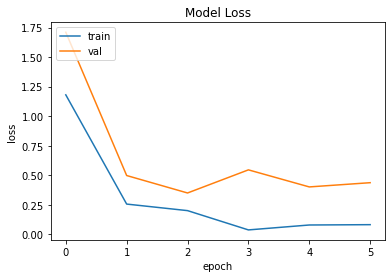

In [6]:
loss_plot = plot_loss_curves(history)
loss_plot.savefig(f'{result_dir}/loss_graph.svg')

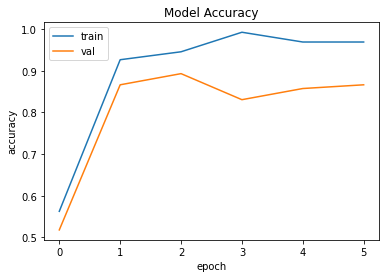

In [7]:
acc_plot = plot_accuracy_curves(history)
acc_plot.savefig(f'{result_dir}/acc_graph.svg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


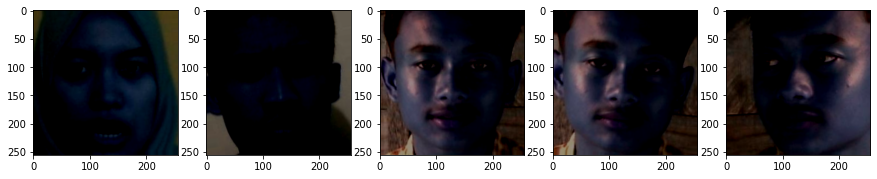

In [8]:
img, label = train_data_augmented.next()

plt.figure(figsize=(15, 8))

# generate batch of images
for i in range(0, 5):
    # fig = plt.figure()
    plt.subplot(1, 5, 1 + i)
    # ax.set_title()
    plt.imshow(img[i])

plt.show()